```{contents}
```

# Performance Metrics

## **1. Internal Metrics (No Ground Truth Needed)**

These metrics evaluate how well the clustering captures **cohesion and separation**.

### **a) Silhouette Score**

* Measures how similar a point is to its **own cluster** vs **other clusters**.
* Formula for point $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:

* $a(i)$ = average distance from $i$ to points in its own cluster
* $b(i)$ = minimum average distance from $i$ to points in other clusters

**Interpretation:**

* $s(i) \approx 1$ → well-clustered
* $s(i) \approx 0$ → on boundary
* $s(i) < 0$ → likely misclustered

---

### **b) Davies-Bouldin Index (DBI)**

* Measures **average similarity between each cluster and its most similar cluster**.

$$
DB = \frac{1}{K} \sum_{i=1}^{K} \max_{j \neq i} \frac{\sigma_i + \sigma_j}{d_{ij}}
$$

* $\sigma_i$ = average distance of points in cluster $i$ to its centroid
* $d_{ij}$ = distance between cluster centroids $i$ and $j$

**Interpretation:**

* Lower DBI → better clustering (more separation, less overlap)

---

### **c) Calinski-Harabasz Index (CH)**

* Ratio of **between-cluster dispersion to within-cluster dispersion**:

$$
CH = \frac{\text{trace}(B_k) / (K-1)}{\text{trace}(W_k) / (N-K)}
$$

* Higher CH → better defined clusters

---

### **d) Cophenetic Correlation Coefficient (CCC)**

* Measures how well the **dendrogram preserves original pairwise distances**:

$$
CCC = \text{correlation}(d_{ij}, d_{ij}^{\text{dendrogram}})
$$

* $d_{ij}$ = original distance between points $i$ and $j$
* $d_{ij}^{\text{dendrogram}}$ = height at which $i$ and $j$ merge in dendrogram

**Interpretation:**

* CCC close to 1 → dendrogram preserves pairwise distances well
* Useful for validating hierarchical structure

---

## **2. External Metrics (Ground Truth Available)**

If true labels are known (rare in real-world unsupervised tasks), we can use:

### **a) Adjusted Rand Index (ARI)**

* Measures agreement between predicted clusters and true labels, adjusted for chance
* ARI = 1 → perfect match, ARI ≈ 0 → random

### **b) Normalized Mutual Information (NMI)**

* Measures shared information between predicted clusters and true labels
* NMI = 1 → perfect match, NMI = 0 → no mutual information

### **c) Fowlkes-Mallows Index (FMI)**

* Geometric mean of **precision and recall** between predicted clusters and true labels
* Range: 0–1, higher is better

---

## **3. Practical Notes**

1. **Choose internal metrics for real unsupervised tasks**, since true labels are usually unknown.
2. **Cophenetic correlation coefficient** is especially useful for hierarchical clustering, because it measures how well the dendrogram represents distances.
3. **Silhouette and Davies-Bouldin** can help decide **optimal number of clusters** by cutting the dendrogram at different heights.

---

**Summary Table**

| Metric                  | Type     | Goal                      | Higher/Lower Better |
| ----------------------- | -------- | ------------------------- | ------------------- |
| Silhouette Score        | Internal | Cohesion vs separation    | Higher              |
| Davies-Bouldin Index    | Internal | Cluster similarity        | Lower               |
| Calinski-Harabasz Index | Internal | Between/within dispersion | Higher              |
| Cophenetic Correlation  | Internal | Dendrogram quality        | Higher              |
| Adjusted Rand Index     | External | Match with true labels    | Higher              |
| Normalized Mutual Info  | External | Shared info with labels   | Higher              |
| Fowlkes-Mallows         | External | Precision/recall          | Higher              |



Clusters | Silhouette | Davies-Bouldin | Calinski-Harabasz | Cophenetic Corr
      2 |      0.687 |          0.459 |          214.067 |           0.977
      3 |      0.849 |          0.210 |         1686.708 |           0.977
      4 |      0.679 |          0.574 |         1308.390 |           0.977
      5 |      0.518 |          0.854 |         1146.523 |           0.977


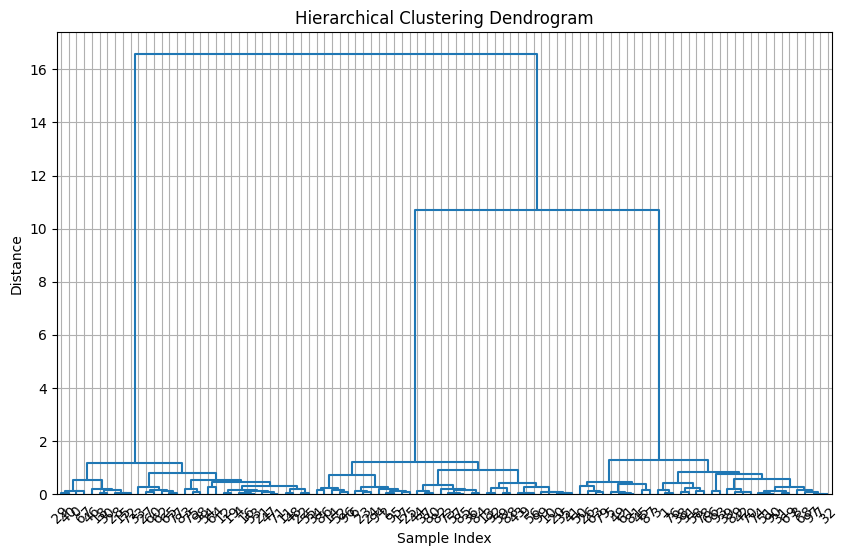

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

# Step 1: Generate synthetic dataset
X, y_true = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
X = StandardScaler().fit_transform(X)

# Step 2: Compute linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Step 3: Evaluate dendrogram with different numbers of clusters
num_clusters = [2, 3, 4, 5]
metrics_results = []

for k in num_clusters:
    labels = fcluster(Z, t=k, criterion='maxclust')
    
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    ccc, _ = cophenet(Z, pdist(X))
    
    metrics_results.append((k, silhouette, dbi, ch, ccc))

# Step 4: Display results
print("Clusters | Silhouette | Davies-Bouldin | Calinski-Harabasz | Cophenetic Corr")
for row in metrics_results:
    print(f"{row[0]:>7} | {row[1]:>10.3f} | {row[2]:>14.3f} | {row[3]:>16.3f} | {row[4]:>15.3f}")

# Step 5: Plot dendrogram
plt.figure(figsize=(10, 6))
from scipy.cluster.hierarchy import dendrogram
dendrogram(Z, color_threshold=0, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()
